In [7]:
import pandas as pd
import scipy, numpy as np
#from chefboost import Chefboost as chef
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import chi2_kernel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
#import scikitplot as skplt

In [8]:
names = ['Decision','x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']
dataset =pd.read_csv("letter-recognition.data",names=names)
#print(dataset.head(3))
array=dataset.values
x=array[:3000,1:17]
y=array[:3000,0]
print(x)
accuracy=[]
fscore=[]

[[2 8 3 ... 8 0 8]
 [5 12 3 ... 8 4 10]
 [4 11 6 ... 7 3 9]
 ...
 [4 7 7 ... 5 2 6]
 [6 10 6 ... 8 10 10]
 [2 3 3 ... 8 2 6]]


In [9]:
######################### PRE PROCESSING ##############################
scaler = MinMaxScaler(feature_range=(0,1))
i=0
while(i<16):
    rescaled_X = scaler.fit_transform(x[:,i].reshape(-1,1))
    np.set_printoptions(precision=2)
    x[:,i]=rescaled_X.reshape(-1)
    i+=1
print(x)

scaler = Normalizer().fit(x)
x = scaler.transform(x)
print(x)

[[0.15384615384615385 0.5333333333333333 0.23076923076923078 ... 0.5 0.0
  0.5384615384615385]
 [0.38461538461538464 0.8 0.23076923076923078 ... 0.5 0.2857142857142857
  0.6923076923076923]
 [0.3076923076923077 0.7333333333333333 0.46153846153846156 ...
  0.4285714285714286 0.21428571428571427 0.6153846153846154]
 ...
 [0.3076923076923077 0.4666666666666667 0.5384615384615385 ...
  0.2857142857142857 0.14285714285714285 0.38461538461538464]
 [0.46153846153846156 0.6666666666666666 0.46153846153846156 ... 0.5
  0.7142857142857142 0.6923076923076923]
 [0.15384615384615385 0.2 0.23076923076923078 ... 0.5 0.14285714285714285
  0.38461538461538464]]
[[0.09 0.3  0.13 ... 0.28 0.   0.31]
 [0.2  0.41 0.12 ... 0.26 0.15 0.36]
 [0.17 0.39 0.25 ... 0.23 0.12 0.33]
 ...
 [0.18 0.28 0.32 ... 0.17 0.08 0.23]
 [0.23 0.33 0.23 ... 0.25 0.36 0.34]
 [0.09 0.12 0.14 ... 0.3  0.09 0.23]]


In [10]:
#############   KNN WITH RANDOM TEST SPLIT ################
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=7)
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
predictions = knn.predict(X_test)
acc = accuracy_score(Y_test,predictions)
f1=f1_score(Y_test, predictions, average='macro')
print(acc)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
accuracy.append(acc)
fscore.append(f1)
###### precision recall graph ###########
p=knn.predict_proba(X_test)
skplt.metrics.plot_precision_recall(Y_test, p)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

0.7922222222222223
[[40  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0
   1  0]
 [ 0 34  0  1  0  1  0  1  0  0  0  0  0  0  0  0  0  6  1  0  0  0  0  0
   0  0]
 [ 0  0 29  0  0  0  3  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  2  0 41  0  0  0  1  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  1  0  0 21  0  1  1  0  0  2  0  0  0  0  1  2  1  2  0  0  0  0  1
   0  0]
 [ 0  2  0  0  0 21  0  0  0  1  0  0  0  0  0  3  0  0  2  0  0  0  1  0
   0  0]
 [ 0  1  2  1  3  0 35  1  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  2  0  3  4  0  0 17  0  0  3  0  0  0  1  2  0  0  1  0  0  0  0  1
   1  0]
 [ 0  0  0  1  0  0  0  0 27  1  0  0  0  0  0  0  0  0  1  0  0  0  0  3
   0  0]
 [ 1  2  0  0  0  0  0  0  1 31  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0]
 [ 0  2  2  0  2  0  0  1  0  0 29  0  0  0  0  0  0  2  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  1  0  1  0  0  0  0 36  0  0  0  0  0  1  0  0  0  0 

NameError: name 'skplt' is not defined

In [12]:
#############   KNN WITH KFOLDS CROSS VAL ################
knn=KNeighborsClassifier(n_neighbors=7)
cv = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in cv.split(x):
    X_train, X_test, Y_train, Y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    knn.fit(X_train,Y_train)
    prediction = knn.predict(X_test)
    print(accuracy_score(Y_test,prediction))

0.8533333333333334
0.83
0.7566666666666667
0.81
0.78
0.8533333333333334
0.8166666666666667
0.8566666666666667
0.76
0.8366666666666667


0.6111111111111112
[[38  0  0  0  0  0  0  1  0  0  1  0  1  1  0  0  0  0  1  0  0  0  0  0
   0  0]
 [ 0 26  0  2  0  0  0  0  5  0  0  0  1  0  0  0  0  6  4  0  0  0  0  0
   0  0]
 [ 0  0 23  0  0  0  0  0  0  0  3  0  0  0  1  0  0  1  5  0  0  0  0  0
   0  0]
 [ 0  1  0 32  0  0  0  3  0  0  0  0  0  0  9  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  2  2  1 11  0  0  0  1  0  2  0  0  0  0  0  1  3  3  0  0  0  0  7
   0  0]
 [ 0  4  0  1  0 18  0  0  1  0  0  0  0  0  0  0  0  0  1  3  0  1  1  0
   0  0]
 [ 0  0  9  0  2  0 18  0  0  0  2  0  0  0  2  0  6  4  2  0  0  0  0  0
   0  0]
 [ 0  4  0  7  0  1  0  7  0  0  2  0  1  0  2  0  1  1  0  0  0  0  0  8
   1  0]
 [ 0  0  0  1  0  0  0  0 28  1  0  0  0  0  0  0  0  0  3  0  0  0  0  0
   0  0]
 [ 0  2  0  1  0  0  0  0  3 25  0  0  0  0  0  0  0  2  3  0  0  0  0  0
   0  0]
 [ 0  2  4  0  3  0  0  0  0  0 15  0  3  0  0  0  0  5  0  0  0  0  0  6
   0  0]
 [ 4  2  0  0  0  0  0  0  2  0  2 27  0  0  1  0  0  0  0  0  0  0 

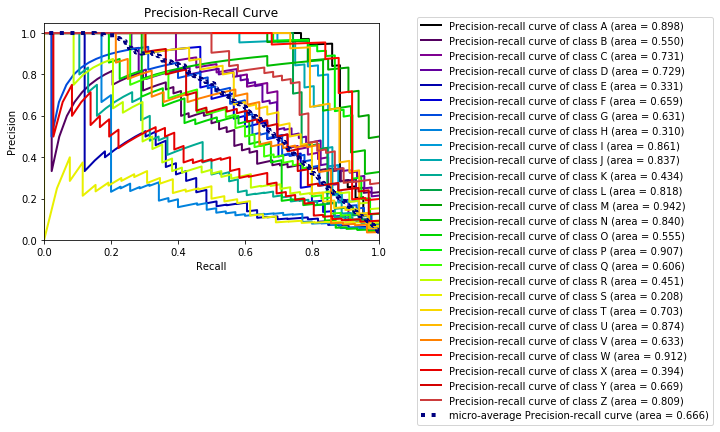

In [13]:
#############   NaiveBayes WITH RANDOM TEST SPLIT ################
naive = GaussianNB()
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=7)
naive.fit(X_train,Y_train)
predictions = naive.predict(X_test)
acc = accuracy_score(Y_test,predictions)
f1=f1_score(Y_test, predictions, average='macro')
print(acc)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
accuracy.append(acc)
fscore.append(f1)
###### precision recall graph ###########
p=naive.predict_proba(X_test)
skplt.metrics.plot_precision_recall(Y_test, p)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [14]:
#############   NaiveBayes WITH KFOLDS CROSS VAL ################
naive = GaussianNB()
cv = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in cv.split(x):
    X_train, X_test, Y_train, Y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    naive.fit(X_train,Y_train)
    predictions = naive.predict(X_test)
    print(accuracy_score(Y_test,predictions))

0.64
0.6366666666666667
0.58
0.61
0.59
0.6766666666666666
0.6333333333333333
0.62
0.5266666666666666
0.65


In [21]:
#############   C4.5 WITH WITH RANDOM TEST SPLIT ################
names = ['Decision','x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']
dataset =pd.read_csv("C:\\Users\\Hp\\Downloads\\letter-recognition.data",names=names)
decision_column=dataset.pop("Decision")
dataset.insert(len(dataset.columns),'Decision',decision_column)
config = {'algorithm': 'C4.5'}
model = chef.fit(dataset.sample(3000), config)
a=[]
array=dataset.values
x=array[:3000,0:16]
y=array[:3000,16]
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=7)
for xx in X_test:
    a.append(chef.predict(model, xx))
acc = accuracy_score(Y_test,a)
f1=f1_score(Y_test, a, average='macro')
accuracy.append(acc)
fscore.append(f1)
print(acc)
print(confusion_matrix(Y_test,a))
print(classification_report(Y_test,a))

C4.5  tree is going to be built...
Accuracy:  25.033333333333335 % on  3000  instances
finished in  47.227261543273926  seconds
0.2544444444444444
[[34  3  0  0  0  0  0  0  0  3  0  0  1  0  0  0  2  0  0  0  0  0  0  0
   0  0]
 [ 0 43  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0 26  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   6  0]
 [ 0 43  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  0  0  0  0  0  0  0
   0  0]
 [ 0 25  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   6  0]
 [ 0 15  0  0  0  1  0  0  0  0  0  0  0  3  0  1  0  0  0  0  0  0  0  0
  10  0]
 [ 0 38  0  1  0  0  0  0  0  0  0  0  1  0  0  0  2  0  0  0  0  0  0  0
   3  0]
 [ 0 26  0  1  0  0  0  0  0  0  0  0  1  6  0  0  0  0  0  0  0  0  0  0
   1  0]
 [ 0  9  0  0  0  0  0  0 20  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0
   1  0]
 [ 1  7  0  0  0  0  0  0  0 12  0  0  0 13  0  0  1  0  0  0  0  0  0  0
   2  0]
 [ 0 33  0  0  0  0  0 

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
################## C4.5 WITH KFOLDS CROSS VAL  ###############

cv = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in cv.split(x):
    X_train, X_test, Y_train, Y_test = x[train_index], x[test_index], y[train_index], y[test_index]
    a=[]
    for xx in X_test:
        a.append(chef.predict(model, xx))
    print(accuracy_score(Y_test,a))

0.25333333333333335
0.2733333333333333
0.27
0.26666666666666666
0.24
0.27
0.22666666666666666
0.23333333333333334
0.2966666666666667
0.26


0.7911111111111111
[[41  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   1  0]
 [ 0 30  0  3  0  0  2  0  0  0  1  0  0  0  1  0  0  3  3  0  0  0  0  0
   1  0]
 [ 0  0 32  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  1  0 40  0  0  0  1  0  0  0  0  0  1  2  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  1  3  0 17  1  2  0  0  0  2  0  0  0  0  0  3  0  3  0  0  0  0  1
   0  0]
 [ 0  2  0  1  0 20  0  1  0  2  0  0  0  0  0  2  0  0  0  0  0  0  1  0
   1  0]
 [ 0  0  4  1  0  0 35  0  0  0  0  0  1  0  1  0  0  0  0  0  0  1  0  2
   0  0]
 [ 0  3  0  3  2  0  1 17  0  0  6  0  0  0  2  0  0  0  0  0  0  0  0  0
   1  0]
 [ 0  0  0  0  0  0  0  0 29  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1]
 [ 0  0  0  1  0  0  0  0  0 34  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0]
 [ 0  0  0  0  1  0  2  0  0  0 28  0  1  2  0  0  0  2  0  0  0  0  0  2
   0  0]
 [ 0  2  0  0  0  0  1  0  0  0  0 33  0  0  0  0  0  2  0  0  0  0 

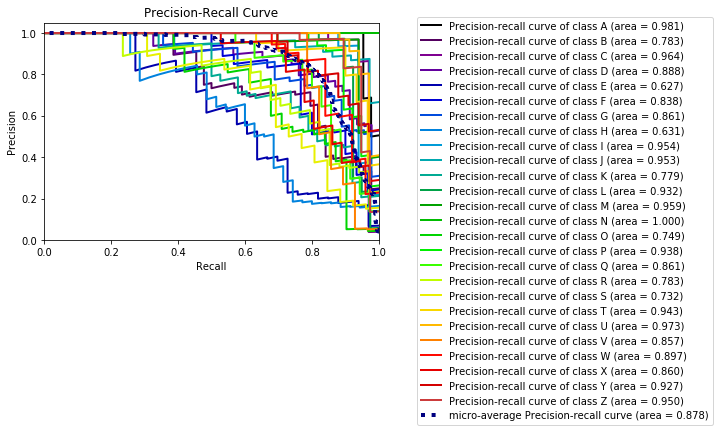

In [18]:
#############   SVC using rbf kernel with chi squared metric WITH RANDOM TEST SPLIT ################
K = chi2_kernel(x, gamma=0.4)
X_train,X_test,Y_train,Y_test = train_test_split(K,y,test_size=0.30,random_state=7)
svclassifier = SVC(kernel='rbf', C=1,probability=True)
svclassifier.fit(X_train,Y_train)
predictions = svclassifier.predict(X_test)
acc = accuracy_score(Y_test,predictions)
f1=f1_score(Y_test, predictions, average='macro')
accuracy.append(acc)
fscore.append(f1)
print(acc)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
###### precision recall graph ###########
p=svclassifier.predict_proba(X_test)
skplt.metrics.plot_precision_recall(Y_test, p)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [7]:
#############   SVC using rbf kernel with chi squared metric WITH KFOLDS CROSS VAL ################
cv = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in cv.split(K):
    X_train, X_test, Y_train, Y_test = K[train_index], K[test_index], y[train_index], y[test_index]
    svclassifier.fit(X_train,Y_train)
    predictions = svclassifier.predict(X_test)
    print(accuracy_score(Y_test,predictions))


0.45
0.54
0.54
0.47
0.58
0.57
0.46
0.48
0.48
0.4


[0.7922222222222223, 0.6111111111111112, 0.2544444444444444, 0.7911111111111111]


<BarContainer object of 4 artists>

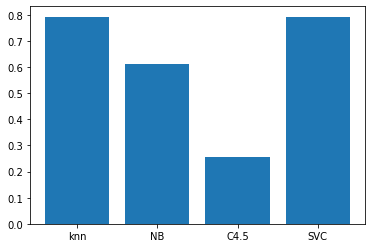

In [25]:
classifiers = ["knn",'NB','C4.5','SVC']
print(accuracy)
plt.bar(classifiers,accuracy)

[0.7957771848149344, 0.6122434291557832, 0.2174197304265209, 0.7915994232344559]


<BarContainer object of 4 artists>

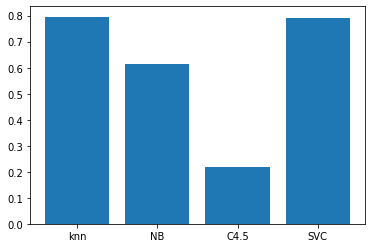

In [26]:
print(fscore)
plt.bar(classifiers,fscore)

In [19]:
scores = cross_val_score(svclassifier, K, y, cv=10)
print(scores)

[0.72 0.66 0.64 0.67 0.69 0.65 0.66 0.7  0.62 0.66]
